# Задача
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. 

Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.

## Проверка
Выберм стандартный уровоень статистической значимости $\alpha = 0.05$

Для дисперсионного анализа есть следующие условия применимости:
1.	Значения групп должны следовать нормальному распределению
2.	Однородность дисперсий
3.	Независимость измерений

1. Проверим на "нормальность" с помощью теста Шапиро - Уилка:

In [ ]:
import numpy as np
import scipy.stats as stats
football = np.array([173, 175, 180, 178, 177, 185, 183, 182])
hockey = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
lifting = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

In [5]:
stats.shapiro(football)

ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)

In [6]:
stats.shapiro(hockey)

ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)

In [7]:
stats.shapiro(lifting)

ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)

Футболисты: P-value 0.94 > $\alpha 0.05$

Хоккеисты: P-value 0.77 > $\alpha 0.05$

Штангисты: P-value 0.5 > $\alpha 0.05$

Все 3 группы имеют нормальное распределение

2. Проверим выборки на однородность дисперсий с помощью Барлетт теста:

In [11]:
stats.bartlett(football, hockey, lifting)

BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)

Три выборки имеют однородность дисперсий

3. Предположим, что предоставленные выборки имеют независимые измерения.

## Анализ
По условию задачи рассматриваем один фактор (средний рост) среди трех независимых групп спортсменов, следовательно проведем однофакторный дисперсионный анализ с помощью функцию f_oneway критерия Фишера

In [9]:
stats.f_oneway(football, hockey, lifting)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698693)

Сформулируем гипотезы:

$H0 : \mu_1=\mu_2=\mu_3$  - средний рост спортсмена не различается в отдельных видах спорта

$H1: \mu_1\neq\mu_2\neq\mu_3$ - средний рост спортсмена различается в отдельных видах спорта

$\alpha$ 0.05 > p-value 0.01

Следовательно при при меньшем p-value, не принимаем нулевую гипотезу, альтернативная гипотеза имеет статистически значимые различия. 

Вывод: средний рост спортсменов различается в отдельных видах спорта. 

## Ответ
Средний рост спортсменов различается в отдельных видах спорта.

## Личное мнение
Приведенный выше ответ не говорит в каких именно видах спорта наблюдаются статистически значимые различия.

Построив график (боксплот), визуально заметна разница среднего роста, в меньшую сторону, штангистов (lifting) по сравнению с остальными спортсменами.
У хоккеистов и футболистов наблюдается одинаковый (с минимальным различием) средний рост.
Хочу отметить, что в америке футболистами (football players) принято называть игроков в американский футбол (аналог регби).
Европейский футбол американцы называют soccer. Игроки в американский футбол, в отличии от европейского, имеют высокий рост сравнимый с хоккеистами.

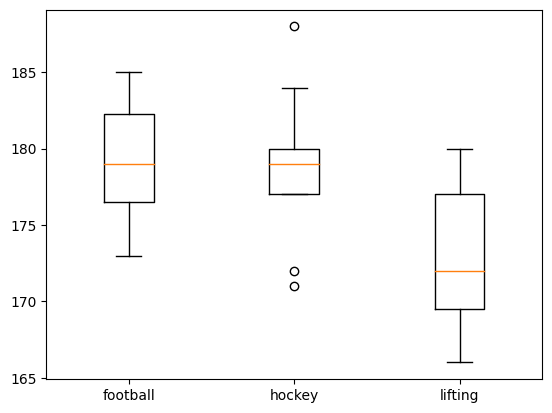

In [28]:
import matplotlib.pyplot as pyplot
pyplot.boxplot([football, hockey, lifting], labels=["football", "hockey", "lifting"])
pyplot.show()

Тест Тьюка проводится с датафреймом numpy, который в свою очередь, требует объема выборок одинакового размера.
Что бы была возможность воспользоваться тестом, я посчитал среднее арифметическое для каждой выборки и дополнил этими значениями каждый массив, до 11 элементов. Т.к. 11 элементов имеет самый длинный массив штангистов.

In [18]:
foot_m = football.mean()
hock_m = hockey.mean()
lift_m = lifting.mean()

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd 

df = pd.DataFrame({"score": [173, 175, 180, 178, 177, 185, 183, 182, foot_m, foot_m, foot_m,
                            177, 179, 180, 188, 177, 172, 171, 184, 180, hock_m, hock_m,
                            172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170],
                 "group": np.repeat(["football","hockey","lifting"], repeats=11)})
df

,score,group
0,173.000000,football
1,175.000000,football
2,180.000000,football
3,178.000000,football
4,177.000000,football
5,185.000000,football
6,183.000000,football
7,182.000000,football
8,179.125000,football
9,179.125000,football


In [20]:
tukey = pairwise_tukeyhsd(df["score"], df["group"], alpha =0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2 meandiff p-adj   lower    upper  reject
--------------------------------------------------------
football  hockey  -0.4583 0.9675  -5.0687   4.152  False
football lifting  -6.3977  0.005 -11.0081 -1.7874   True
  hockey lifting  -5.9394 0.0094 -10.5497 -1.3291   True
--------------------------------------------------------


В результата теста, получаем таблицу, в которой видна статистическая разница между Футболистами и Штангистами, Хоккеистами и Штангистами. А статистической разницы в среднем росте между Футболистами и Хоккеистами не обнаружено.